# FordGoBike_DataVisualization
This is an exploraton of the the FordGoBike dataset from San Francisco in 2018.   
Analysis and Visualization: Liz Herdter  
March 2019

**Objective**: Use visualizations to gain insight about trends in rider usage. Specifically identify when and where rider usage is highest and identify possible locations for additional bikes (or removal of stations). 

1. Perform any necessary wrangling  
2. Expore the dataset visually
3. Gain insight about trends in rider usage

**About the Data**  
Ford GoBike is a bike share system in the San Francisco Bay Area. This program was piloted in 2013 and as of 2018 there were 7000 bikes in the Ford GoBike fleet spread across the Bay Area, East Bay, and San Jose. The bikes are locked into a network of docking stations around the city. They can be unlocked from one station and returned to any other station making them ideal for one way trips. The bike are accessible 24/7/365. More about this program is can be accessed [here](https://www.fordgobike.com/about). 

Sources used:  
https://stackoverflow.com/questions/41514173/change-multiple-columns-in-pandas-dataframe-to-datetime  
https://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not/33757291  
https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date-in-python

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

In [2]:
#define path for data within in Jupyter Notebook
path = r'Data/'
all_files = glob.glob(path + "/*.csv")

# Join all dataframes together 
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
#explore shape and features within dataset
df.shape

(1863721, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [12]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes


In [9]:
df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [10]:
df.duplicated().sum()

0

### Structure of the dataset

This dataset has 16 features and nearly 2 million records. Each record corresponds to a single trip made. 

### Main features of interest

This dataset can be used to explore the total number of rides at an hourly, daily, weekly, and monthyl temporal resolution. It can also be used to learn about peak rides from each station. Other interesting features included the interaction between number of rides made in each hour based on the day as well as average duration across hours in each day. Additionally, this dataset will provide information about what stations are most traveled too and from and identify areas where more bikes might be used or target spatial areas for new bikeshare stations. 


### Features to support investigation

This dataset contains a wealth of information that can be used to explore rider patterns. Specific features include duration_sec, start time, end time, start station id, end station id, and user_type. There are some missing records for start and end station id but we can fill these in using stations that match the same start and end station lat for the missing ones. Age of rides (member_birth_year) may also be informative but ~5% of the records are missing information for this feature, most likely because only a portion of the users are members. 





## Perform necessary wrangling

**Quality Issues**
1. Start_time and end_time as type objects
2. start and end station id as type ints 
3. Bike id is int
4. Member birth year is int
5. Missing values for start and end station. 
**Structural Issues**  
Technically speaking, this dataset is quite tidy as it is but in order to explore rider preference on a temporal and spatial scale new features will be needed based on the start and end time. Duration will need to be converted and binned. 

>start time
1. new column for hour
2. new column for day 
3. new column for month 
4. new column for day of week

>end time
1. new column for hour
2. new column for day 
3. new column for month 
4. new column for day of week


> duration
1. convert to minutes
2. cut bins 

**Deal with quality issues first**

In [5]:
df1 = df.copy()

1. Change start and end time to type datetime

In [6]:
df1[['start_time', 'end_time']]=df1[['start_time', 'end_time']].apply(pd.to_datetime)

2-4. Change start and end station id from float to string.  bike id, and member_birthyear to type object.

In [7]:
#df1[['start_station_id', 'end_station_id', 'bike_id', "member_birth_year"]]=df1[['start_station_id', 'end_station_id', 'bike_id', 'member_birth_year']].astype('str')
df1[['start_station_id', 'end_station_id']]=df1[['start_station_id', 'end_station_id']].fillna(0).astype(int)
df1[['start_station_id', 'end_station_id']]=df1[['start_station_id', 'end_station_id']].fillna(0).astype(str)



In [8]:
df1[['bike_id', "member_birth_year"]]=df1[['bike_id', 'member_birth_year']].astype('str')



In [197]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_birth_year          object
member_gender              object
bike_share_for_all_trip    object
dtypes: datetime64[ns](2), float64(4), int64(1), object(9)
memory usage: 227.5+ MB


5. Explore missing values for start and end station id 

In [60]:
#get unique lat longs to see which bikes are not recording station 
lat_long = df1.drop_duplicates(subset= ['start_station_latitude', 'start_station_longitude'])
lat_long.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
315,278,2018-02-28 19:51:24.334,2018-02-28 19:56:03.297,336,Potrero Ave and Mariposa St,37.763281,-122.407377,124,19th St at Florida St,37.760447,-122.410807,3016,Subscriber,1984,Male,No
112298,335,2018-11-30 06:42:41.154,2018-11-30 06:48:16.342,271,San Pablo Park,37.855783,-122.283127,265,Ninth St at Parker St,37.858868,-122.291209,3597,Subscriber,1966,Male,No
478040,816,2018-06-23 13:45:35.985,2018-06-23 13:59:12.384,NaN,NaN,37.390000,-121.960000,NaN,NaN,37.380000,-121.940000,4240,Subscriber,1987,Male,No
106745,905,2018-11-30 23:29:52.456,2018-11-30 23:44:58.094,371,Lombard St at Columbus Ave,37.802746,-122.413579,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,2464,Subscriber,1977,Male,No
106748,369,2018-11-30 23:36:17.314,2018-11-30 23:42:27.248,370,Jones St at Post St,37.787327,-122.413278,19,Post St at Kearny St,37.788975,-122.403452,2752,Subscriber,1992,Male,No


In [61]:
#which bikes are not recording
lat_long[lat_long.start_station_id.isna()].bike_id.value_counts()

4102    7
4147    3
4281    3
4250    3
4184    3
4289    2
4163    2
4165    2
4259    2
4127    2
4095    2
4105    2
4240    2
4099    2
4238    2
4111    2
4181    2
4193    2
4254    1
4144    1
4257    1
4243    1
4247    1
3975    1
4260    1
4263    1
4136    1
4425    1
4140    1
4270    1
4245    1
3769    1
4276    1
4120    1
4288    1
4110    1
4207    1
4132    1
4122    1
4202    1
4201    1
4196    1
4190    1
4185    1
4277    1
4179    1
4171    1
4297    1
4168    1
4295    1
4160    1
4284    1
4155    1
3758    1
4097    1
Name: bike_id, dtype: int64

In [162]:
#test
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 26 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_birth_year          object
member_gender              object
bike_share_for_all_trip    object
start_hour                 int64
start_day                  int64
start_month                int64
start_weekday              int64
end_hour                   int64
end_day                    int64
end_month                  int64
end_weekday                int64
duration_mins              float64
duration_hours           

**Now deal with structural items**

In [9]:
#start time
#1. new column for hour
#2. new column for day 
#3. new column for month 
#4. new column for day of week

df1['start_hour'] = df1.start_time.dt.hour
df1['start_day'] = df1.start_time.dt.day
df1['start_month'] = df1.start_time.dt.month
df1['start_weekday'] = df1.start_time.dt.weekday


df1['end_hour'] = df1.end_time.dt.hour
df1['end_day'] = df1.end_time.dt.day
df1['end_month'] = df1.end_time.dt.month
df1['end_weekday'] = df1.start_time.dt.weekday

In [ ]:
# duration
#1. convert to minutes
#2. cut bins 

In [10]:
df1['duration_mins'] = df1.duration_sec/60
df1['duration_hours']=df1.duration_sec/3600


In [11]:
#cut bins
bins = np.arange(0, int(df1.duration_hours.max()+0.1)+1, 1)
bins

df1['duration_hours'] = pd.cut(df1['duration_hours'], bins)

In [12]:
#check to see it worked
df1.loc[:, ['duration_sec', 'duration_mins', 'duration_hours']].sample(10)

,duration_sec,duration_mins,duration_hours
581382,954,15.900000,"(0, 1]"
1252532,303,5.050000,"(0, 1]"
1784670,244,4.066667,"(0, 1]"
832402,657,10.950000,"(0, 1]"
817606,714,11.900000,"(0, 1]"
1579648,569,9.483333,"(0, 1]"
1825278,495,8.250000,"(0, 1]"
824418,363,6.050000,"(0, 1]"
742298,223,3.716667,"(0, 1]"
34608,608,10.133333,"(0, 1]"


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

**Univariate:**
1. How many rides for each hour
2. How many rides for each month
3. How many rides on day of week 
4. How many rides from each start station
5. How many rides to each end station
6. Distribution of duration



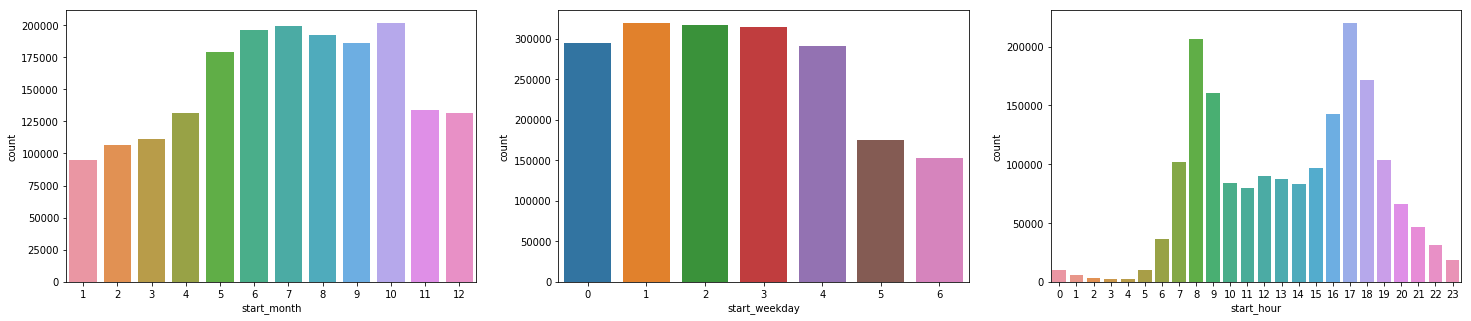

In [75]:
plt.figure(figsize =[25,5])

#explore total rides by start month
plt.subplot(1,3,1)
sb.countplot(data=df1, x='start_month')

#explore total rides by start month
plt.subplot(1,3,2)
sb.countplot(data=df1, x ='start_weekday')

#explore total rides by start hour
plt.subplot(1,3,3)
sb.countplot(data=df1, x ='start_hour')


**Preliminary Take Aways**
1. Total rides are variable over months with greater total rides occuring during the summer months (June - October). In September total rides decline a bit (likely because of the hot weather) and then peak back in October when fall comes and the weather is much nicer.

2. Total rides by duration clearly follow a log-normal distribution as evident by the very right skewed distribution. I will explore the duration distribution in below cells. 

3. Additionally, there are more frequent rides occuring during the week (0-4; Monday - Friday) as opposed to during the weekend (5-6; Saturday - Sunday). 

4. It is also apparent that the bike share is being used quite a bit by commuters as the total rides peak during commuting hours between 7-9 AM and then between 4- 7 PM. 

**Next Steps**  
I am interested in taking a deeper dive into how weekday and start hour interact. I suspect that the patterns on the weekend will be a bit different. 

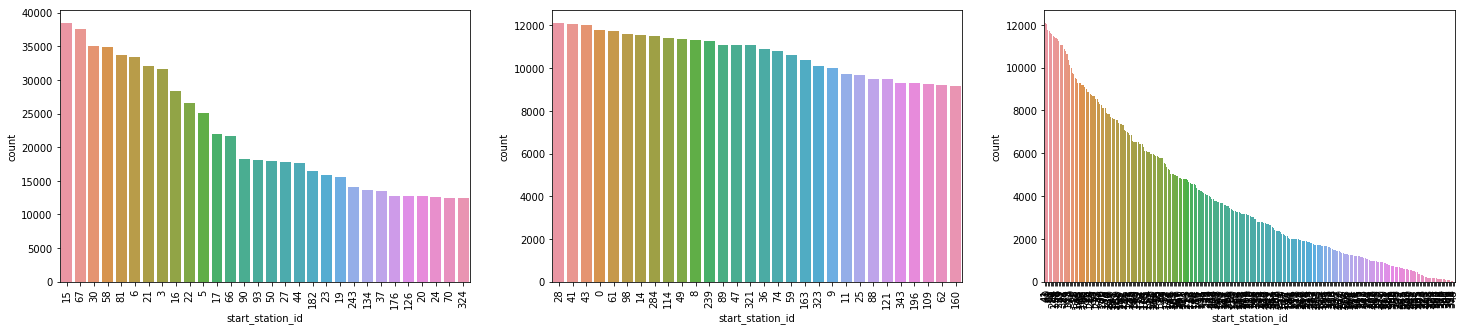

In [76]:
#explore total rides by starting station
plt.figure(figsize =[25,5])

order = df1.start_station_id.value_counts().index[0:30]
plt.subplot(1,3,1)
sb.countplot(data=df1[df1['start_station_id'].isin(order)], x='start_station_id', order= order)
plt.xticks(rotation=90);


plt.subplot(1,3,2)
order1 = df1.start_station_id.value_counts().index[31:61]
sb.countplot(data=df1[df1['start_station_id'].isin(order1)], x='start_station_id', order= order1)
plt.xticks(rotation=90);

plt.subplot(1,3,3)
order2 = df1.start_station_id.value_counts().index[32:]
sb.countplot(data=df1[df1['start_station_id'].isin(order2)], x='start_station_id', order= order2)
plt.xticks(rotation=90);

**Preliminary Take Aways**

>Start Station
1. There are a select amount of stations that are used frequently. Here they are stations 15,67,30,58,81,6,21,3,16,22,5,17,66. There are many other stations that are used a moderate amount (center plot)
2. There are many stations that are used far fewer times throughout the year. 

**Next Steps**  
I am interested in taking a deeper dive into station usage by hour or day to identify high priority stations. Also, it may be useful to identify the frequently unused stations. When are they frequently unused?  

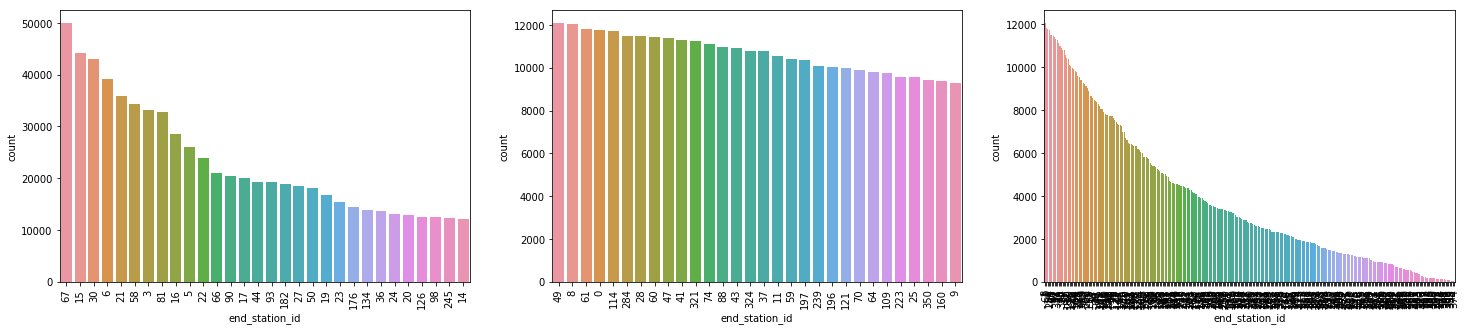

In [77]:
#explore total rides by ending station
plt.figure(figsize =[25,5])

order = df1.end_station_id.value_counts().index[0:30]
plt.subplot(1,3,1)
sb.countplot(data=df1[df1['end_station_id'].isin(order)], x='end_station_id', order= order)
plt.xticks(rotation=90);


plt.subplot(1,3,2)
order1 = df1.end_station_id.value_counts().index[31:61]
sb.countplot(data=df1[df1['end_station_id'].isin(order1)], x='end_station_id', order= order1)
plt.xticks(rotation=90);

plt.subplot(1,3,3)
order2 = df1.end_station_id.value_counts().index[32:]
sb.countplot(data=df1[df1['end_station_id'].isin(order2)], x='end_station_id', order= order2)
plt.xticks(rotation=90);

**Preliminary Take Aways**

>End Station
1. Here it appears that station 67 and 15 are frequently used as ending stations as well as 30,4,21,58, 3, and 81.
2. As with start station there are many stations that are used quite a bit as ending stations and many stations that are used very infrequently

**Next Steps**  
I am interested in taking a deeper dive into station usage by hour or day to identify high priority ending locations. Also, it may be useful to identify the frequently unused stations. When are they frequently unused? 

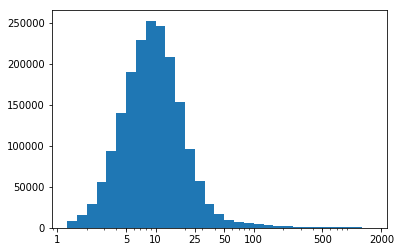

In [84]:
#explore distribution of ride duration
bin_edges = 10**np.arange(0.1, np.log10(df1.duration_mins.max())+0.1, 0.1)

plt.hist(df1['duration_mins'], bins = bin_edges)
plt.xscale('log')

tick_locs = [1,5,10,25, 50,100,500,2000]
plt.xticks(tick_locs, tick_locs);


**Preliminary Take Aways**

> Duration 
1. Duration is log distributed and this figure reflects some axis transformation that I did to better display the data. Average duration over the entire dataset is around 10 minutes. There were a handful of bikes that were checked out for an entire day, although there are so few of these that these are just outliers. 

**Next Steps**  
May be interesting to see if average duration changes much by month, day, or start hour. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

**Bivariate**
1. Average duration vs month
2. Average duration vs day of week 
3. Average duration vs starting hour 

4. Number of rides per hour by month
5. Number of rides per hour by weekday

6. Number of rides per station by month
7. Number of rides per station by week day 
7. Number of rides per station by start hour 

### Ride Duration

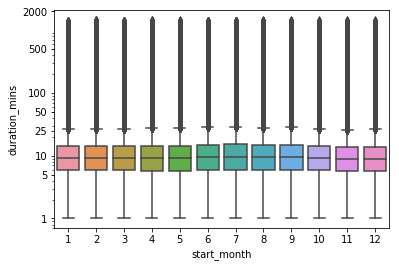

In [93]:
#explore average duration by start month
ticks = [1,5,10,25, 50,100,500,2000]

g = sb.boxplot(data=df1, x='start_month', y='duration_mins')
g.set(yscale='log')
g.set(yticks = ticks)
g.set_yticklabels(ticks);

**Preliminary Take Aways**

> Duration by start month
1. Average ride duration was consistent across starting months. Average ride duration was 10 minutes across all months in 2018. 

**Next Steps**  
Explore average duration by weekday and by hour 

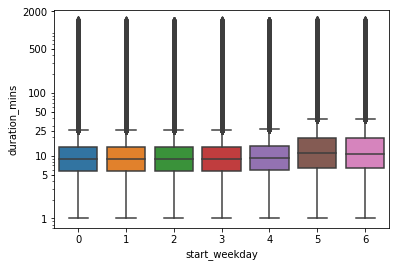

In [94]:
#explore average duration by start weekday
ticks = [1,5,10,25, 50,100,500,2000]

g = sb.boxplot(data=df1, x='start_weekday', y='duration_mins')
g.set(yscale='log')
g.set(yticks = ticks)
g.set_yticklabels(ticks);

**Preliminary Take Aways**

> Duration by start weekday
1. Average ride duration was consistent across working week days (0-4). Ride duration increases slightly on the weekend (5-6), perhaps because people are more leisurely with their rides on the weekends.   

**Next Steps**  
Explore average duration by hour and the interaction between start hour and weekday (0-6). 

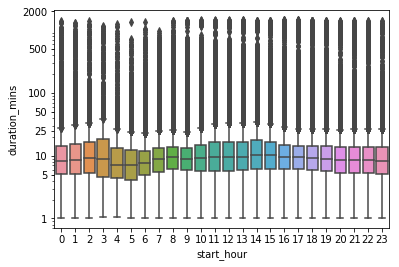

In [91]:
#explore average duration by start hour
ticks = [1,5,10,25, 50,100,500,2000]

g = sb.boxplot(data=df1, x='start_hour', y='duration_mins')
g.set(yscale='log')
g.set(yticks = ticks)
g.set_yticklabels(ticks);

**Preliminary Take Aways**

> Duration by start hour
1. Ride duration seems consistent across starting hour although there is some variation in ride hour in the early morning time (around 2-3 AM). Average duration remains around 10 minutes. 

**Next Steps**  
Multivariate exploration of ride duration by start hour and weekday to explore the notion that people may be more leisurely with their rides on the weekend.

### Hourly Ride Count

/Users/elizabethherdter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


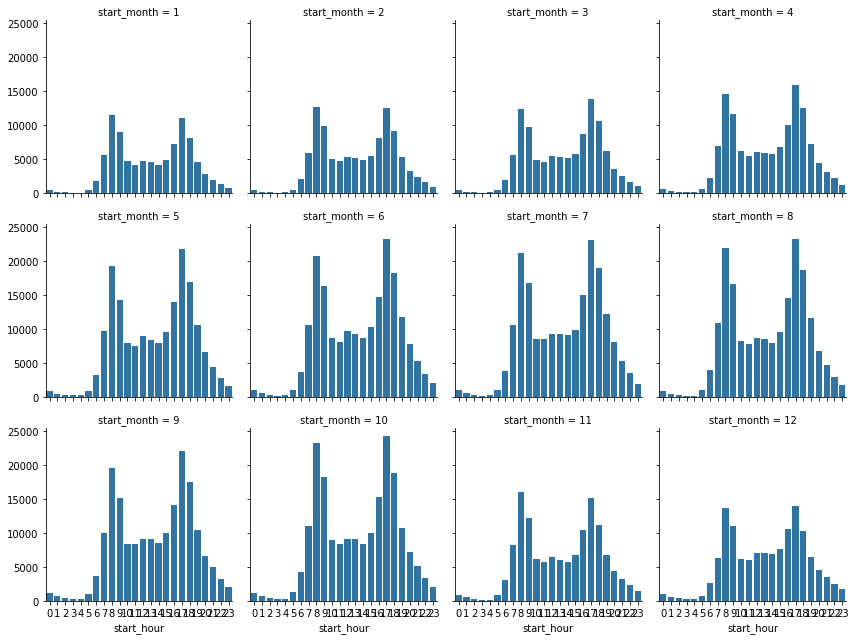

In [105]:
#number of rides per hour by month
g = sb.FacetGrid(data=df1, col='start_month', col_wrap=4)
g.map(sb.countplot, 'start_hour')

**Preliminary Take Aways**

> Total rides by start hour over month
1. Total rides by start hour follow a similar pattern over each month. Total rides peak during commuting hours. Overall total rides decline in the winter months and peak during the summer months.   

**Next Steps**  
Explore the number of rides per hour by weekday to see if there is more variability. 

/Users/elizabethherdter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


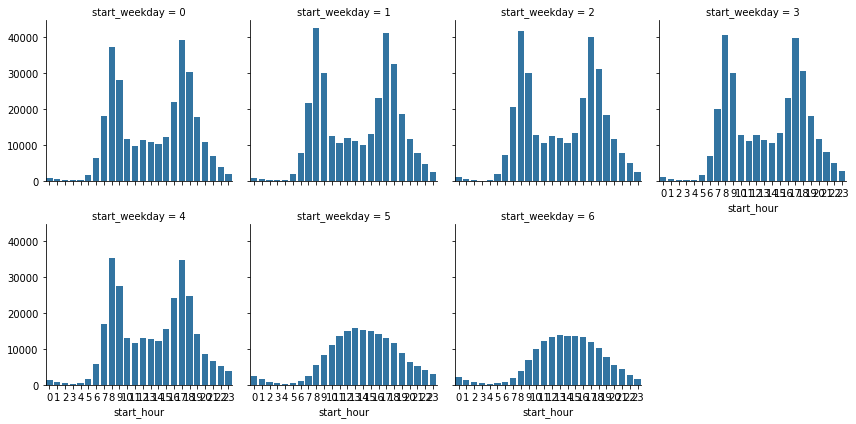

In [162]:
#number of rides per hour by weekday
g = sb.FacetGrid(data=df1, col='start_weekday', col_wrap=4)
g.map(sb.countplot, 'start_hour')

**Preliminary Take Aways**

> Total rides by start hour over weekday
1. Total rides by start hour follow a similar pattern during the work week but clearly there is a difference
in total rides by start hour on Saturday and Sunday (5,6). 


### Station Ride Rate - Top 50 stations


In [164]:
#number of rides per station by month
#first select the top 50 stations to make the visuals better
top50stations= df1.start_station_id.value_counts().index[:50]



/Users/elizabethherdter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x360 with 0 Axes>

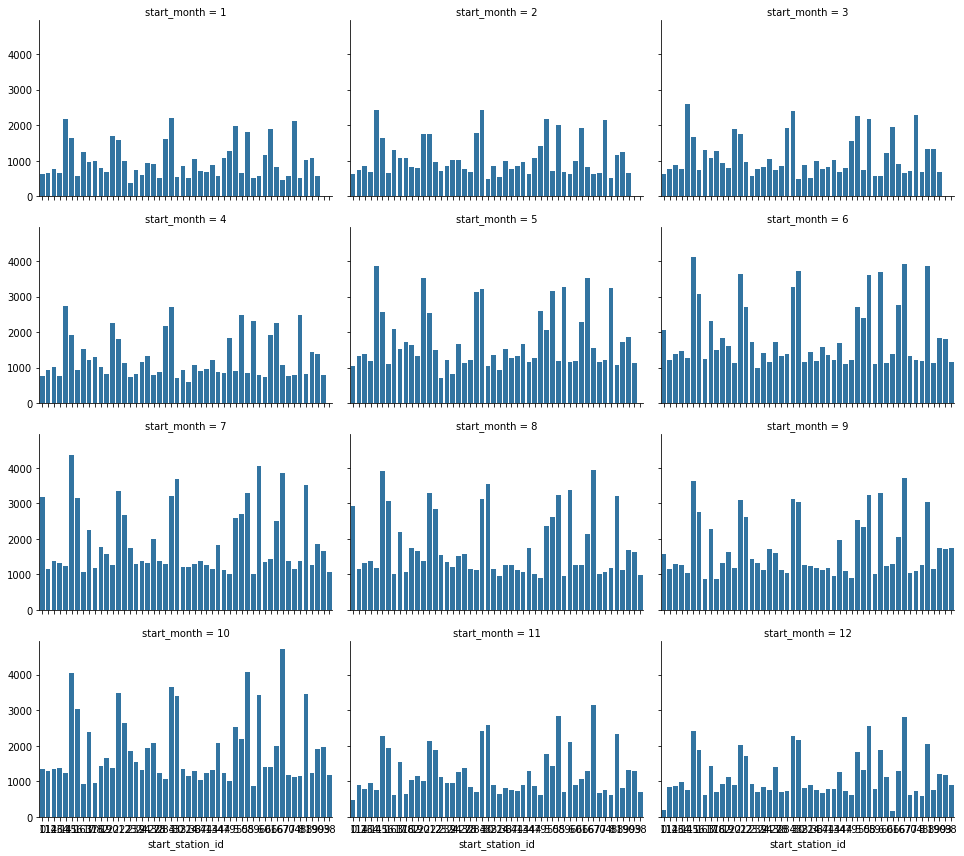

In [165]:
plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=df1[df1['start_station_id'].isin(top50stations)], col='start_month', col_wrap=3, aspect=1.5)
g.map(sb.countplot, 'start_station_id')

**Preliminary Take Aways**

> Rides by station over start month
1. There is temporal variability in total rides per station, as previous figures also indicate. Generally though, the relative usage pattern among these top 50 stations remains relatively constant throughout the year excpet for perhaps in December and January when many people may be away from work do to many religious holidays.  

**Next Steps:**
Explore the number of rides per station by weekday to see if station usage is affected by commuters. 



/Users/elizabethherdter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x360 with 0 Axes>

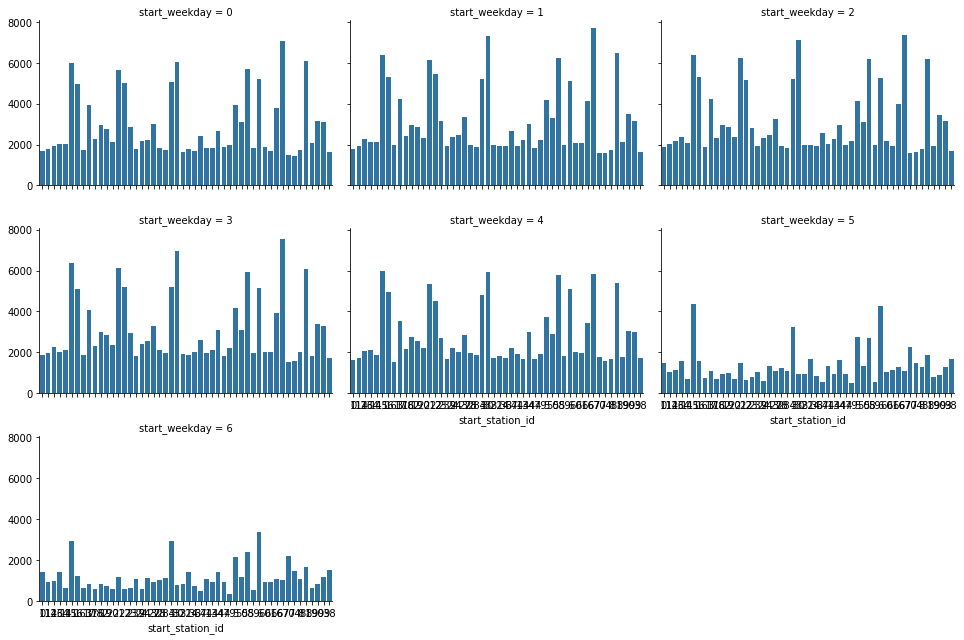

In [126]:
#number of rides per station by weekday
plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=df1[df1['start_station_id'].isin(top50stations)], col='start_weekday', col_wrap=3, aspect=1.5)
g.map(sb.countplot, 'start_station_id')

**Preliminary Take Aways**

> Rides by station over start day 
1. There are fewer total rides on the weekends, as previous figures also indicate. Notably there is also temporal variability in rides by station. Stations that are used many times during working days are used infrequently to other stations on the weekend. 

**Next Steps:**
Explore the number of rides per station by start hour to identify which stations are being used most for commuting.  



/Users/elizabethherdter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x360 with 0 Axes>

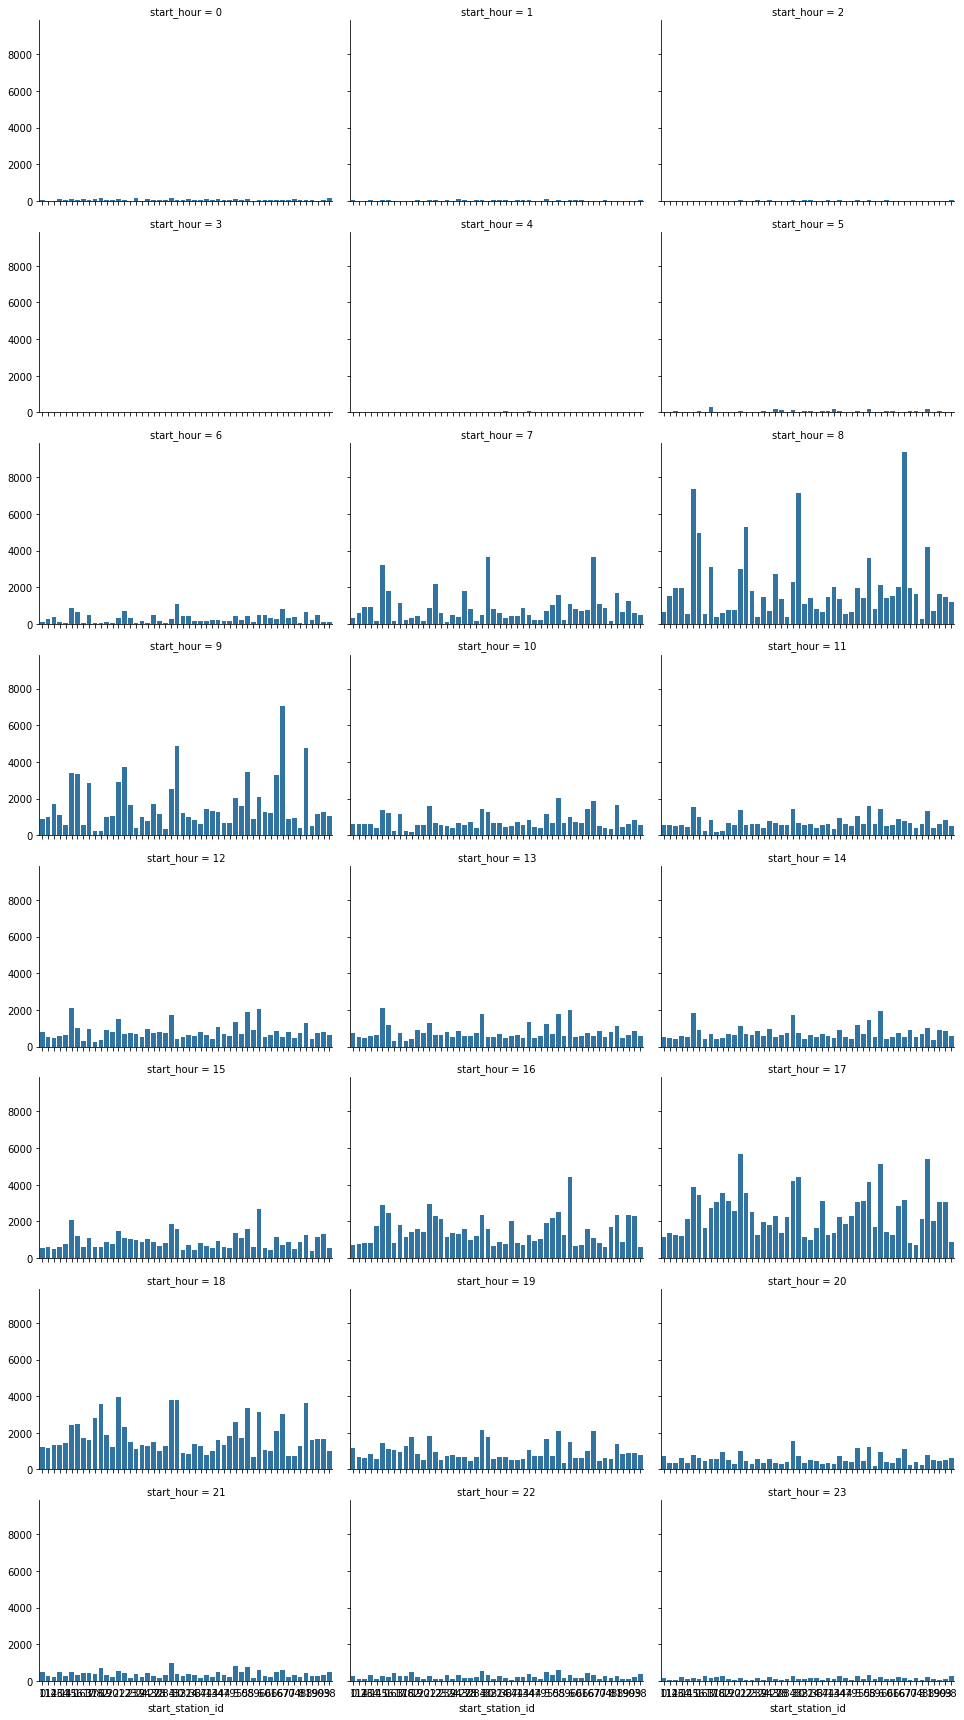

In [166]:
#number of rides per station by start hour
plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=df1[df1['start_station_id'].isin(top50stations)], col='start_hour', col_wrap=3, aspect=1.5)
g.map(sb.countplot, 'start_station_id')

**Preliminary Take Aways**

> Rides per station by start hour  
1. It is very apparent that certain stations are being relied on heavily for commuting with marked spikes during 7-9AM, noon, and 4-6PM. 

**Next Steps:**
1. Explore the mid-range stations. 

2. Multivariate visualization. Dig into station utilization by exploring total rides per start station by starting hour and the day of the week. 

3. Multivariate visualizations. Also, explore station utilization by exploring total rides associted with ending stations by ending hour and day of the week. 


### Station Ride Rate - Moderately Used Station Rates

In [167]:
#number of rides per station by month
mid_stations= df1.start_station_id.value_counts().index[51:100]




/Users/elizabethherdter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x360 with 0 Axes>

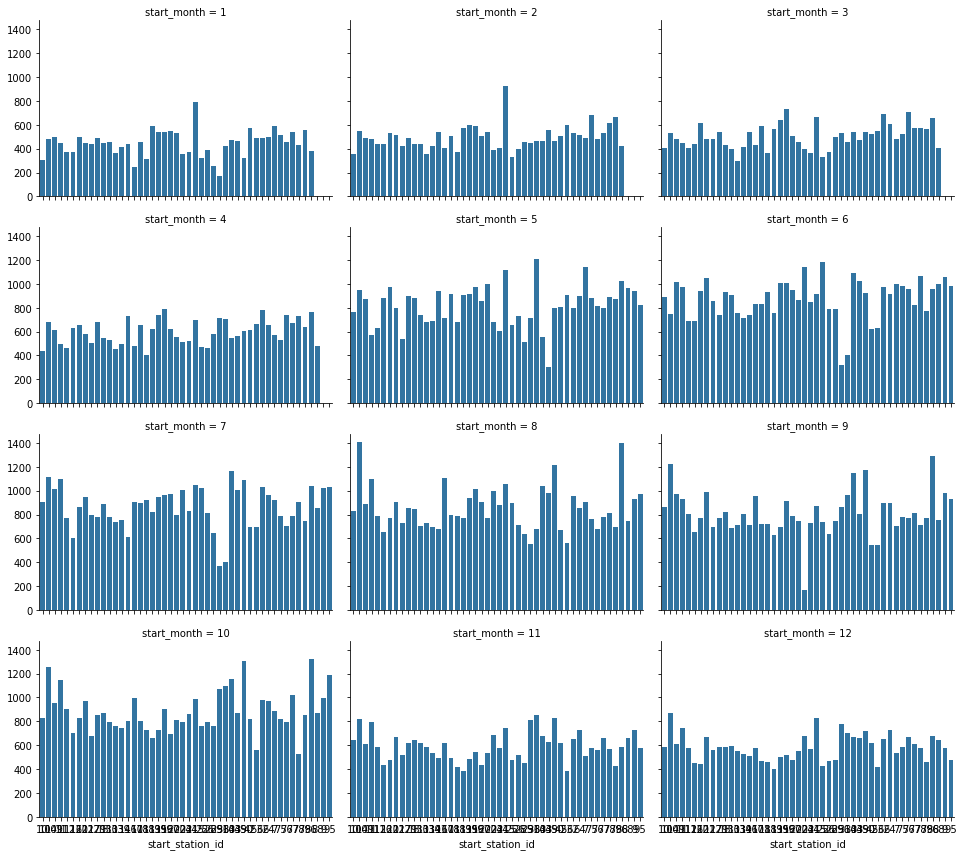

In [168]:
plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=df1[df1['start_station_id'].isin(mid_stations)], col='start_month', col_wrap=3, aspect=1.5)
g.map(sb.countplot, 'start_station_id')

**Preliminary Take Aways**

> Rides per station by start montn 
1. Among the moderately used stations, there is definitely a temporal trend in their usage rate. With one station being used quite more compared to the others in January and February. Station usage changes a bit during the summertime and during the month of Septmber one station was used only a small portion of the time. 

**Next Steps:** Explore usage patterns for the lowest used stations. 


/Users/elizabethherdter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x360 with 0 Axes>

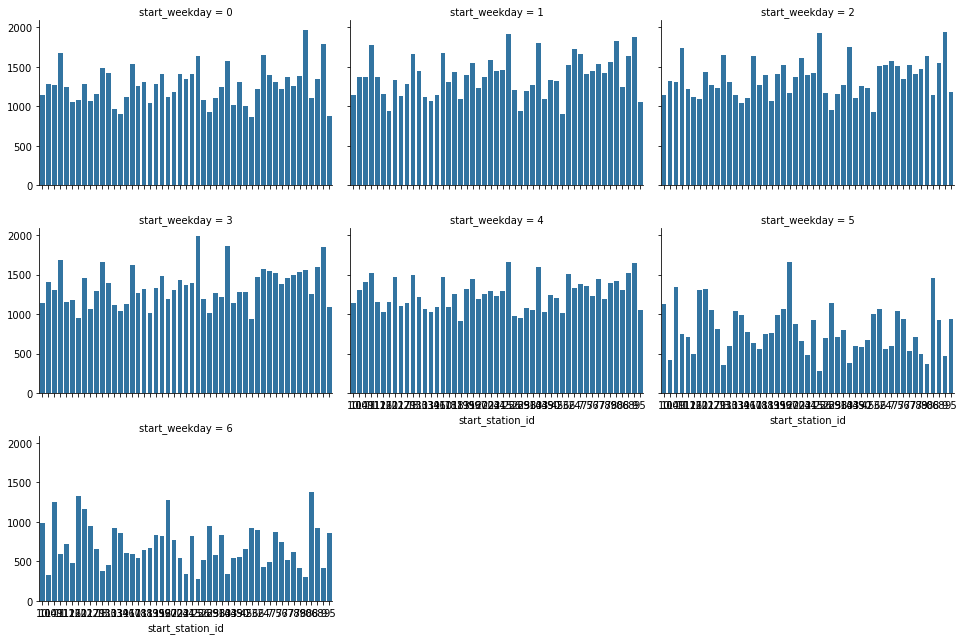

In [130]:
#number of rides per station by weekday
plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=df1[df1['start_station_id'].isin(mid_stations)], col='start_weekday', col_wrap=3, aspect=1.5)
g.map(sb.countplot, 'start_station_id')

**Preliminary Take Aways**

> Rides per station by start weekday
1. Among the moderately used stations, there is some temporal variability in usage which is especially apparent 
on the weekend where there is an increase in usage at selected stations which are not the dominantly used stations during the week. 

**Next Steps**: Explore usage pattern for lowest used stations.


### Station Ride Rate - Infrequently Used Station Rates

In [169]:
#number of rides per station by month
low_stations= df1.start_station_id.value_counts().index[275:]

/Users/elizabethherdter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x360 with 0 Axes>

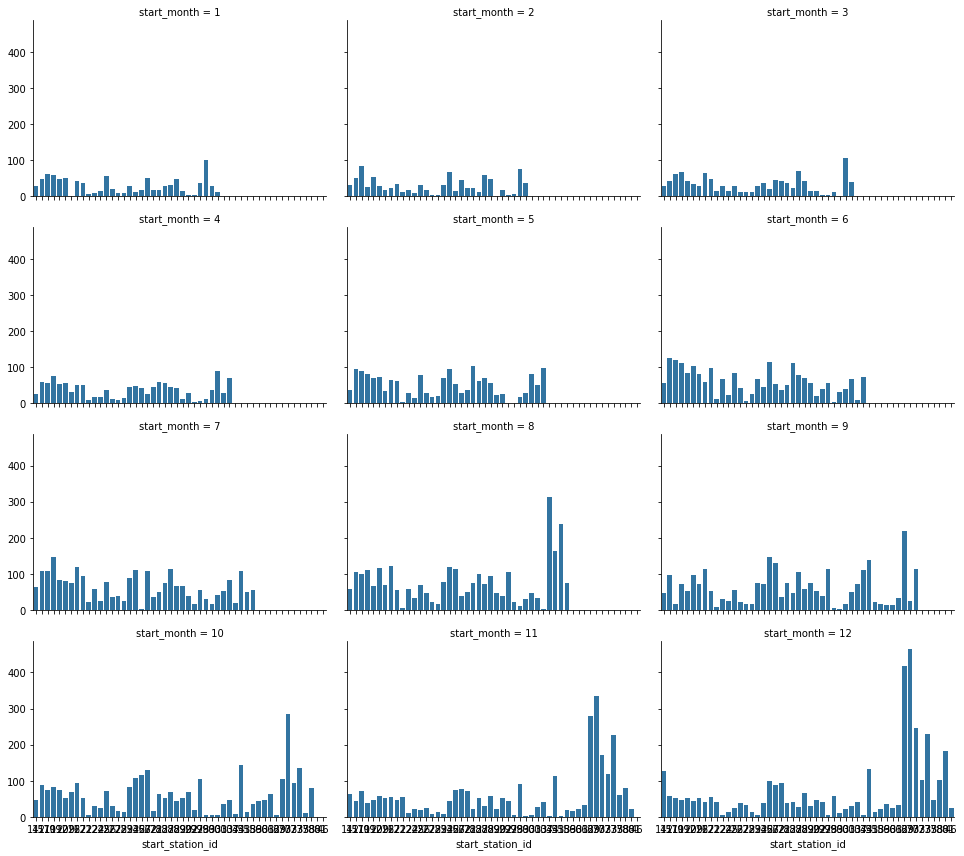

In [170]:
plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=df1[df1['start_station_id'].isin(low_stations)], col='start_month', col_wrap=3, aspect=1.5)
g.map(sb.countplot, 'start_station_id')

**Preliminary Take Aways**

> Rides per station by start month
1. Among lowest used stations there is a very evident temporal variation in usage. Many stations which are not used during January and February are used much more frequenylt in the mid to late summer. Some stations are never used October or November. 
A select few stations are only used during the end month. 


/Users/elizabethherdter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x360 with 0 Axes>

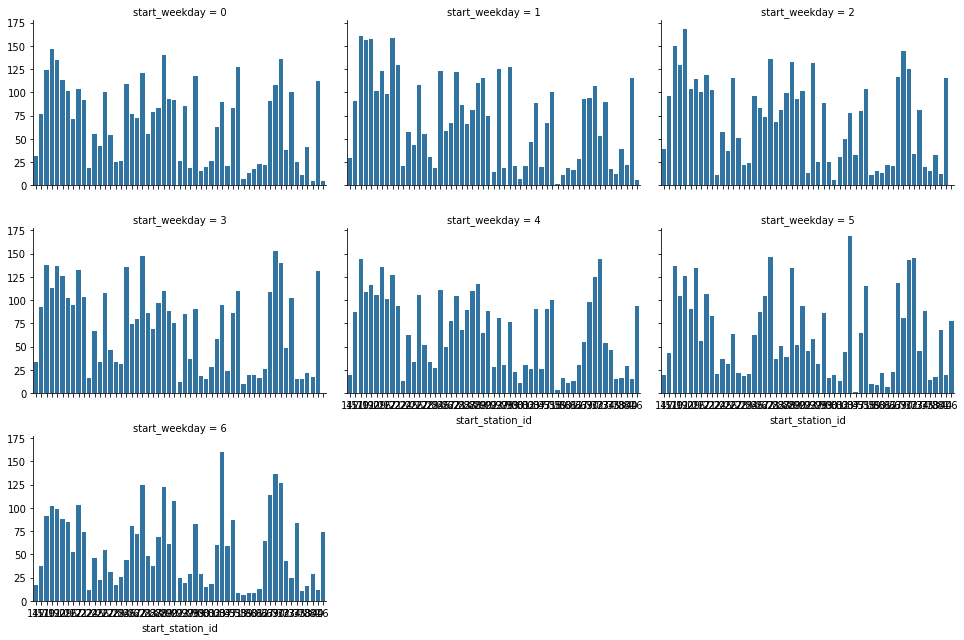

In [171]:
#number of rides per station by weekday
plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=df1[df1['start_station_id'].isin(low_stations)], col='start_weekday', col_wrap=3, aspect=1.5)
g.map(sb.countplot, 'start_station_id')

**Preliminary Take Aways**

> Rides per station by start weekday
1. Usage by start weekday in these lowest used stations varies temporally, slightly, but not nearly as starkly as by month. There are some stations that are used much more frequently 
during the weekday and a select few that are used a long on the weekend. There are a handful of rides from these bike stations that were used less than 25 times. 


## Multivariate Exploration


**Multivariate**

Stations used most for commuting:  
1. Number of rides per start_station by start hour (7-9 AM)(5-7PM) and day of week (work week)

Members/guests for each station and work week:
2. Number of rides per start_station by user type and day of the week (work week)?


Most frequent start and stop station (what is the path most traveled):
1. during the week
2. during the weekend

Which stations could be phased out during a portion of the year? 
1. Of the least used stations- which days of the week and months are they not ever used? 




### Stations used for commuting?

In [173]:
weekday = [0,1,2,3,4]
commuting = df1[df1['start_weekday'].isin(weekday)]
top50com = commuting.start_station_id.value_counts().index[:50]
top50com
#top_stations= df1.start_station_id.value_counts().index[:50]
#weekday = [0,1,2,3,4]


Index(['67', '30', '15', '81', '58', '21', '6', '16', '3', '22', '5', '17',
       '66', '90', '27', '93', '50', '182', '44', '23', '19', '37', '243',
       '176', '24', '20', '126', '134', '49', '14', '60', '43', '28', '61',
       '41', '89', '59', '114', '324', '36', '321', '284', '47', '25', '239',
       '9', '163', '8', '0', '343'],
      dtype='object')

In [ ]:
#start station
plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=commuting[commuting['start_station_id'].isin(top50com)], col='start_weekday',
                 row='start_hour',  aspect=1.5, margin_titles=True)
g.map(sb.countplot, 'start_station_id')

**Preliminary Take Aways**

> Rides per stations most used for commuting
1. These are the top start stations being used for commuting. Day of the week does not affect station usage for commuting. People are consistent in what stations they use for commuting Monday through Friday and for lunch time.


/Users/elizabethherdter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x360 with 0 Axes>

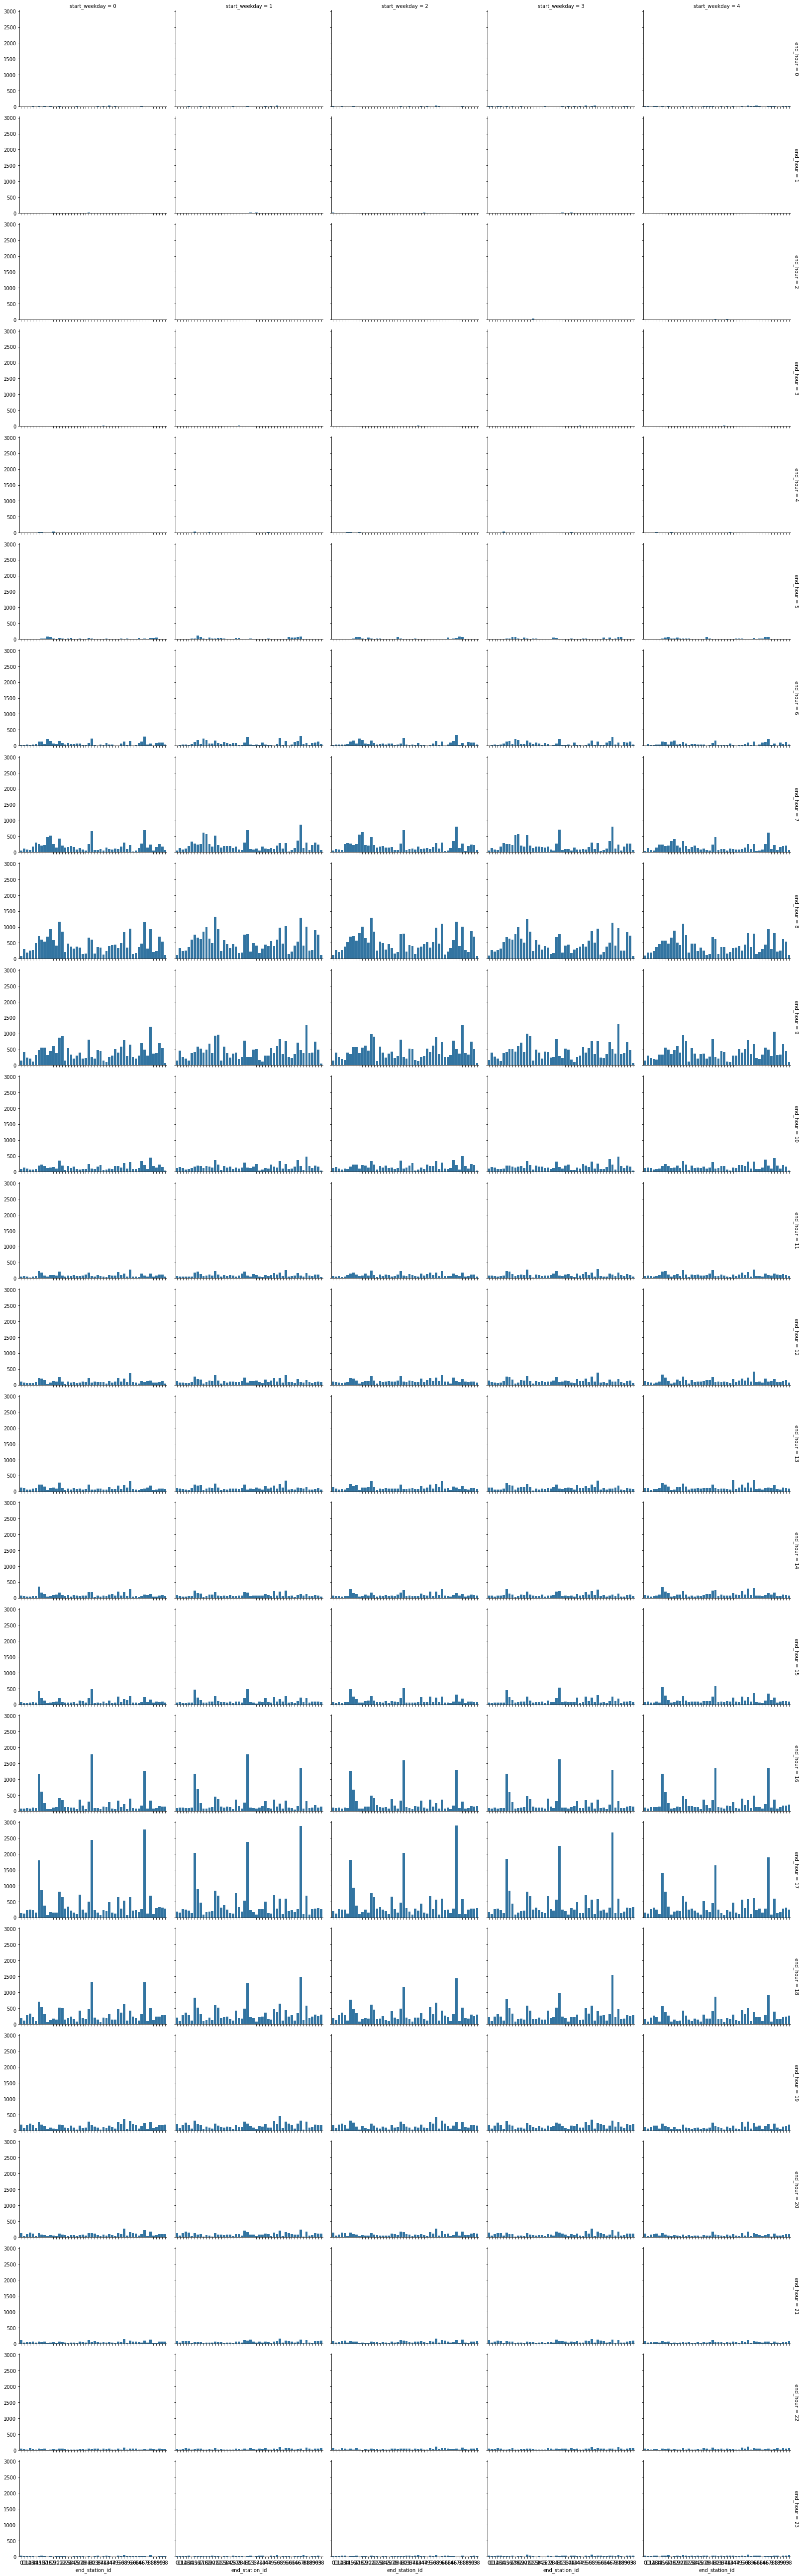

In [150]:
#end station
top50endcom = commuting.end_station_id.value_counts().index[:50]


plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=commuting[commuting['end_station_id'].isin(top50endcom)], col='start_weekday',
                 row='end_hour',  aspect=1.5, margin_titles=True)
g.map(sb.countplot, 'end_station_id')

**Preliminary Take Aways**

> Rides per stations most used for commuting - end station
1. These are the top end stations being used for commuting. Day of the week does not affect station usage for commuting. People are consistent in what stations they use for commuting Monday through Friday and for lunch time.



### Stations used for leisure. 

In [155]:
weekday = [5,6]
leisure = df1[df1['start_weekday'].isin(weekday)]
top50leis = leisure.start_station_id.value_counts().index[:50]
top50leis



Index(['6', '15', '3', '58', '5', '70', '81', '98', '324', '44', '134', '197',
       '74', '0', '86', '16', '323', '21', '120', '109', '50', '121', '93',
       '41', '243', '8', '66', '28', '284', '239', '10', '126', '67', '285',
       '61', '27', '127', '60', '62', '133', '114', '53', '75', '196', '43',
       '47', '17', '88', '139', '195'],
      dtype='object')

/Users/elizabethherdter/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x360 with 0 Axes>

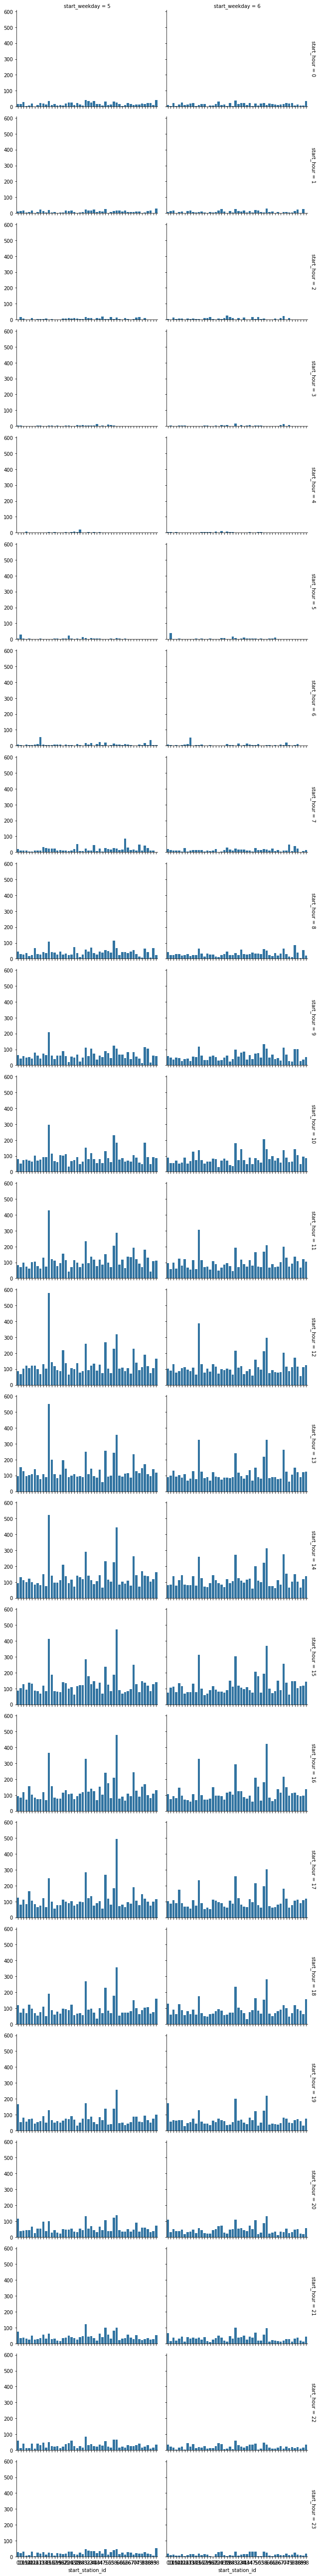

In [154]:
#start station
plt.figure(figsize=[25,5])
g = sb.FacetGrid(data=leisure[leisure['start_station_id'].isin(top50leis)], col='start_weekday',
                 row='start_hour',  aspect=1.5, margin_titles=True)
g.map(sb.countplot, 'start_station_id')

**Preliminary Take Aways**

> Rides for stations most used for leisure
1. Certain stations are used much more on Saturdays than they are on Sundays which is most apparent around the 2 PM in the afternoon. The statons are used more frequently on Saturday than they are on Sundays. 

In [161]:
df1.duplicated(subset=['start_station_id', 'end_station_id']).mean()

0.981902334093998

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!